In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('/kaggle/input/evsegm/IEA Global EV Data Clean 2024.csv')

# Check the first few rows and column data types
print(data.head())
print(data.info())

# Drop unnecessary columns
data = data[['mode', 'powertrain', 'year', 'value']]

# Convert columns to appropriate types
data['year'] = pd.to_numeric(data['year'], errors='coerce')
data['value'] = pd.to_numeric(data['value'], errors='coerce')

# Handle missing values if any
data.dropna(inplace=True)

# Encode categorical variables
data_encoded = pd.get_dummies(data, columns=['mode', 'powertrain'])
print(data_encoded.head())



  region    category parameter  mode powertrain  year      unit  value
0  India  Historical  EV sales  Cars        BEV  2010  Vehicles    450
1  India  Historical  EV sales  Cars        BEV  2011  Vehicles   1400
2  India  Historical  EV sales  Cars        BEV  2012  Vehicles    190
3  India  Historical  EV sales  Cars        BEV  2013  Vehicles    410
4  India  Historical  EV sales  Cars        BEV  2014  Vehicles   1000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   region      41 non-null     object
 1   category    41 non-null     object
 2   parameter   41 non-null     object
 3   mode        41 non-null     object
 4   powertrain  41 non-null     object
 5   year        41 non-null     int64 
 6   unit        41 non-null     object
 7   value       41 non-null     int64 
dtypes: int64(2), object(6)
memory usage: 2.7+ KB
None
   year  value  m

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

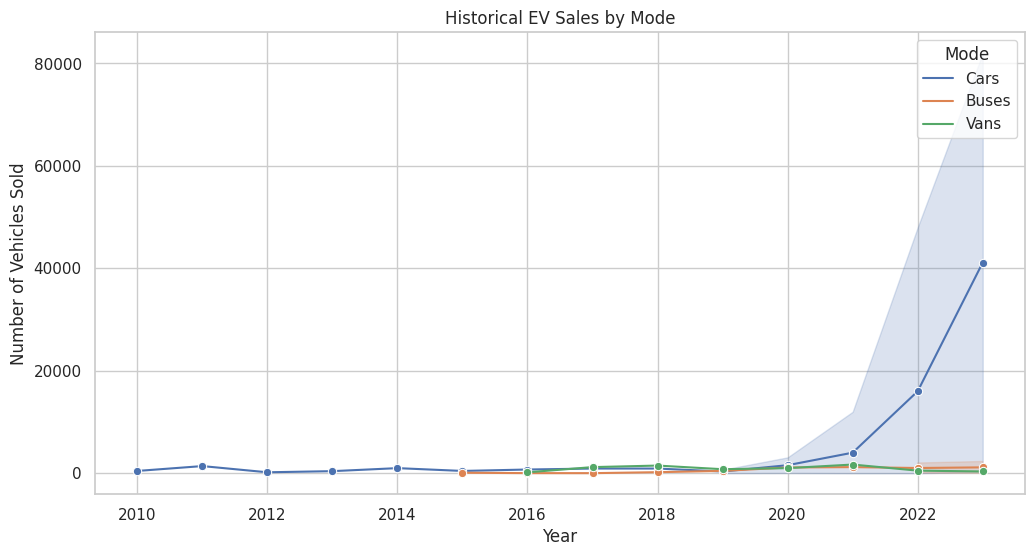

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

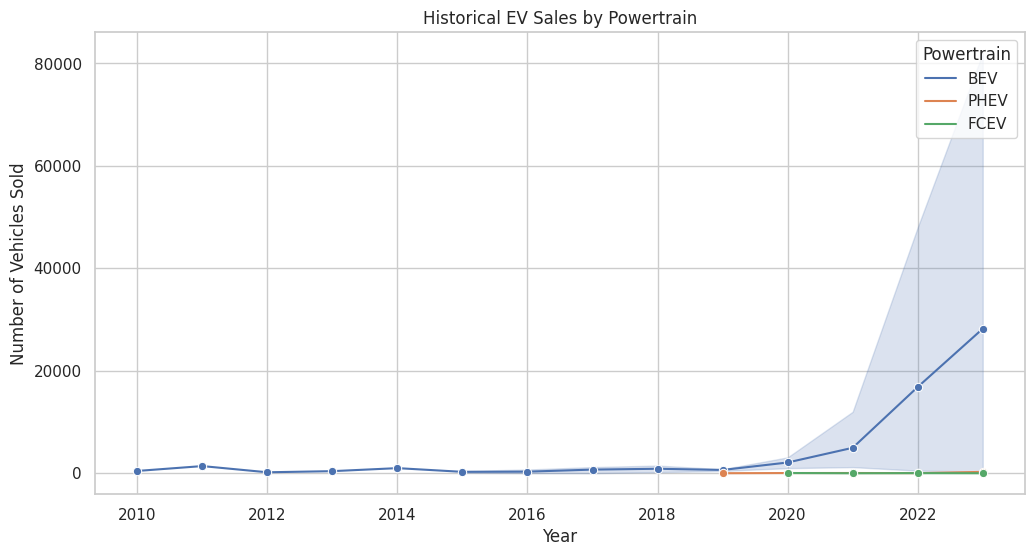

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Historical EV Sales by Mode
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='mode', data=data, marker='o')
plt.title('Historical EV Sales by Mode')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles Sold')
plt.legend(title='Mode')
plt.grid(True)
plt.show()

# Historical EV Sales by Powertrain
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', hue='powertrain', data=data, marker='o')
plt.title('Historical EV Sales by Powertrain')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles Sold')
plt.legend(title='Powertrain')
plt.grid(True)
plt.show()


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


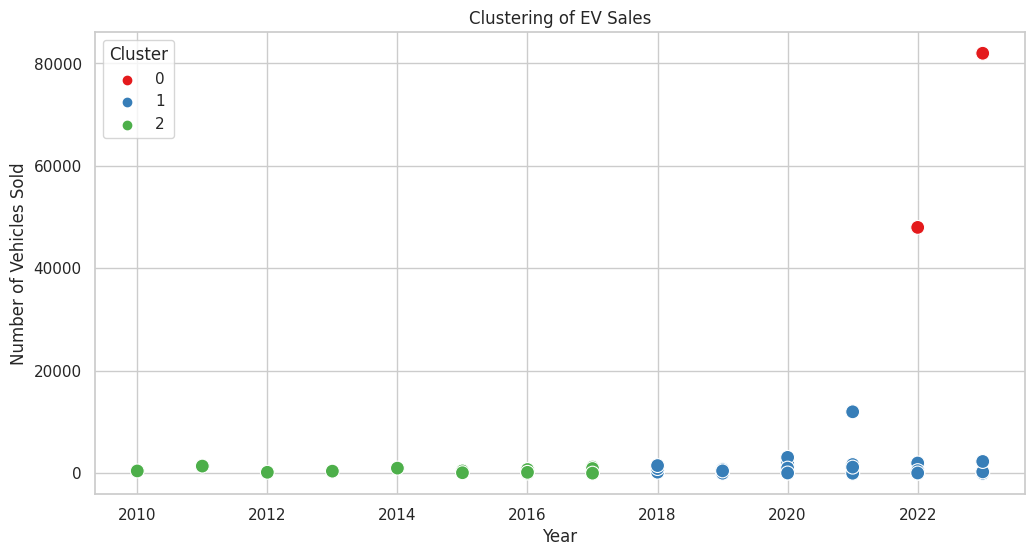

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Prepare data for clustering
features = data_encoded[['year', 'value']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Plot clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='value', hue='cluster', data=data, palette='Set1', s=100)
plt.title('Clustering of EV Sales')
plt.xlabel('Year')
plt.ylabel('Number of Vehicles Sold')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Prepare features and target
X = data_encoded.drop(columns=['value'])
y = data_encoded['value']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Hyperparameter tuning for Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train, y_train)

# Best parameters and model for Random Forest
print(f'Best Random Forest Parameters: {rf_grid_search.best_params_}')
best_rf_model = rf_grid_search.best_estimator_

# Hyperparameter tuning for Gradient Boosting (as an additional model)
gb_model = GradientBoostingRegressor(random_state=42)
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0]
}
gb_grid_search = GridSearchCV(estimator=gb_model, param_grid=gb_param_grid, cv=5, n_jobs=-1, verbose=2)
gb_grid_search.fit(X_train, y_train)

# Best parameters and model for Gradient Boosting
print(f'Best Gradient Boosting Parameters: {gb_grid_search.best_params_}')
best_gb_model = gb_grid_search.best_estimator_

# Evaluate both models using cross-validation
rf_cv_scores = cross_val_score(best_rf_model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
print(f'Random Forest Cross-Validated MAE: {-rf_cv_scores.mean()}')

gb_cv_scores = cross_val_score(best_gb_model, X_scaled, y, cv=5, scoring='neg_mean_absolute_error')
print(f'Gradient Boosting Cross-Validated MAE: {-gb_cv_scores.mean()}')

# Choose the best model based on cross-validation MAE
if -rf_cv_scores.mean() < -gb_cv_scores.mean():
    print("Using Random Forest Model for Predictions")
    best_model = best_rf_model
else:
    print("Using Gradient Boosting Model for Predictions")
    best_model = best_gb_model

# Predict and evaluate on the test set
y_pred = best_model.predict(X_test)
print('Mean Absolute Error on Test Set:', mean_absolute_error(y_test, y_pred))

# Prepare future data for prediction
modes = data['mode'].unique()
powertrains = data['powertrain'].unique()
years = [2024, 2025, 2026]

# Create all combinations for future predictions
combinations = pd.DataFrame(
    [(year, mode, powertrain) for year in years for mode in modes for powertrain in powertrains],
    columns=['year', 'mode', 'powertrain']
)

# Encode future data
future_encoded = pd.get_dummies(combinations, columns=['mode', 'powertrain'])
future_encoded = future_encoded.reindex(columns=X.columns, fill_value=0)
future_encoded_scaled = scaler.transform(future_encoded)  # Apply scaling to future data

# Predict future sales using the best model
future_sales = best_model.predict(future_encoded_scaled)
combinations['predicted_sales'] = future_sales

# Show the results
print(combinations)



Fitting 5 folds for each of 270 candidates, totalling 1350 fits
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=   0.8s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.3s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=300; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.2s